In [47]:
import os
import json
import pandas as pd

In [79]:
NER_FOLDER = os.getenv("NER_FOLDER")

with open(f"{NER_FOLDER}/NER.json", 'r') as f:
    data = json.load(f)

In [80]:
final = []
for d in data:
    id_prop = d['id_prop']
    ner = d['ner']
    for n in ner:
        if n['label'] == 'LOC':
            final.append({'id_prop': id_prop, 'loc': n['span']})

df = pd.DataFrame(final)
df_locals = pd.DataFrame(df['loc'].unique(), columns=['local'])

df_locals_classified = pd.read_csv('./output/df_locals_classified.csv', encoding='latin1', delimiter=';')
df_locals_classified['id'] = df_locals_classified['id'].astype(int)
df_local = df_locals.merge(df_locals_classified[['id', 'classification']], left_index=True, right_on='id')
df = df.merge(df_local[['local', 'classification']], left_on='loc', right_on='local')

In [101]:
def classify(x):
    if x == 'regional':
        return 0
    if x == 'national':
        return 1
    return 0
    

df['clf'] = df['classification'].apply(classify)

<Axes: ylabel='Frequency'>

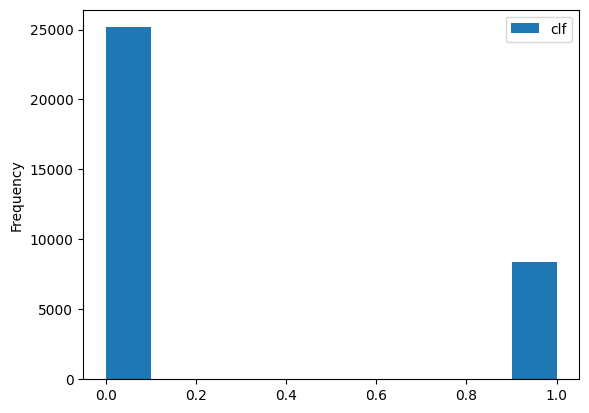

In [115]:
df_classification = df[['id_prop', 'clf']].groupby(['id_prop']).max()
df_classification.plot(kind='hist')

In [116]:
df_classification.to_csv('./output/df_locals_classification_final.csv')